### LinkedIn Groups JSON File extraction

In [554]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from time import sleep
import html5lib
import json
import codecs
import matplotlib.pyplot as plt

## Interests - Groups

In [343]:
df = pd.read_json('./avelo-test.json', encoding='utf-8')

In [579]:
df.interests.str.contains('Carrière & Emploi - Candidat-Online').count()

0

In [534]:
df_groups = df.interests[0]['groups']
dff = pd.DataFrame(df_groups)
dff

,url,name,count
0,https://www.linkedin.com/groups/9078052,Dirigeantes & Territoires - Groupe réservé aux...,124
1,https://www.linkedin.com/groups/8407650,Cadres supérieurs Ville de Paris,119
2,https://www.linkedin.com/groups/8812403,Riposte créative territoriale https://riposte...,2247
3,https://www.linkedin.com/groups/3314208,L'actualité juridique par LegalNews et Le Mond...,33363
4,https://www.linkedin.com/groups/4511959,AIVP - Intergénérations,491
5,https://www.linkedin.com/groups/3844351,Ponts ParisTech Masters,621
6,https://www.linkedin.com/groups/74689,Ponts Alumni Group,4203
7,https://www.linkedin.com/groups/3761165,Moderniser l'action publique,16968
8,https://www.linkedin.com/groups/7460544,Ingénieurs en Chef Territoriaux de France,150
9,https://www.linkedin.com/groups/1541967,Fonction Publique Territoriale,42915


In [540]:
for i in range(1, len(df)):
    try:
         dff=dff.append(df.interests[i]['groups'],ignore_index=True)
    except Exception:
        pass

C:\Users\adema\AppData\Local\Temp\ipykernel_20024\100589091.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff=dff.append(df.interests[i]['groups'],ignore_index=True)
C:\Users\adema\AppData\Local\Temp\ipykernel_20024\100589091.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff=dff.append(df.interests[i]['groups'],ignore_index=True)
C:\Users\adema\AppData\Local\Temp\ipykernel_20024\100589091.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff=dff.append(df.interests[i]['groups'],ignore_index=True)
C:\Users\adema\AppData\Local\Temp\ipykernel_20024\100589091.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff=dff.append(d

C:\Users\adema\AppData\Local\Temp\ipykernel_20024\100589091.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff=dff.append(df.interests[i]['groups'],ignore_index=True)
C:\Users\adema\AppData\Local\Temp\ipykernel_20024\100589091.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff=dff.append(df.interests[i]['groups'],ignore_index=True)
C:\Users\adema\AppData\Local\Temp\ipykernel_20024\100589091.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff=dff.append(df.interests[i]['groups'],ignore_index=True)
C:\Users\adema\AppData\Local\Temp\ipykernel_20024\100589091.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff=dff.append(d

C:\Users\adema\AppData\Local\Temp\ipykernel_20024\100589091.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff=dff.append(df.interests[i]['groups'],ignore_index=True)
C:\Users\adema\AppData\Local\Temp\ipykernel_20024\100589091.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff=dff.append(df.interests[i]['groups'],ignore_index=True)
C:\Users\adema\AppData\Local\Temp\ipykernel_20024\100589091.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff=dff.append(df.interests[i]['groups'],ignore_index=True)
C:\Users\adema\AppData\Local\Temp\ipykernel_20024\100589091.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff=dff.append(d

In [543]:
dff = dff.sort_values(by=['count'], ascending=False)
dff

,url,name,count
341,https://www.linkedin.com/groups/3044917,Harvard Business Review Discussion Group,2387997
26,https://www.linkedin.com/groups/2046019,Finance Club,1648075
28,https://www.linkedin.com/groups/102696,Dubai Recruitment (DubaiRecruitment.net),1261202
266,https://www.linkedin.com/groups/78629,Media & Marketing Professionals Worldwide,980144
38,https://www.linkedin.com/groups/56766,STARTUP SPECIALISTS NETWORK - Entrepreneurs Bu...,882900
...,...,...,...
194,https://www.linkedin.com/groups/8847986,Promotion L3 BGE mineur Environnement 2019-2020,21
459,https://www.linkedin.com/groups/8618826,Professionnelles Public Local,20
125,https://www.linkedin.com/groups/3943996,Cindynique,14
544,https://www.linkedin.com/groups/12089571,Dirigeants et Managers territoriaux,13


In [545]:
dff.to_csv('Groups.csv', index=False)

In [546]:
fileopen = open('./final_groups.csv', encoding='utf-8')
readfile = pd.read_csv(fileopen)
dframe = pd.DataFrame(readfile)
dframe

,name,count,url
0,Harvard Business Review Discussion Group,2387997,https://www.linkedin.com/groups/3044917
1,Finance Club,1648075,https://www.linkedin.com/groups/2046019
2,Dubai Recruitment (DubaiRecruitment.net),1261202,https://www.linkedin.com/groups/102696
3,Media & Marketing Professionals Worldwide,980144,https://www.linkedin.com/groups/78629
4,STARTUP SPECIALISTS NETWORK - Entrepreneurs Bu...,882900,https://www.linkedin.com/groups/56766
...,...,...,...
347,Promotion L3 BGE mineur Environnement 2019-2020,21,https://www.linkedin.com/groups/8847986
348,Professionnelles Public Local,20,https://www.linkedin.com/groups/8618826
349,Cindynique,14,https://www.linkedin.com/groups/3943996
350,Dirigeants et Managers territoriaux,13,https://www.linkedin.com/groups/12089571


In [557]:
dframe['count']

0      2387997
1      1648075
2      1261202
3       980144
4       882900
        ...   
347         21
348         20
349         14
350         13
351          9
Name: count, Length: 352, dtype: int64

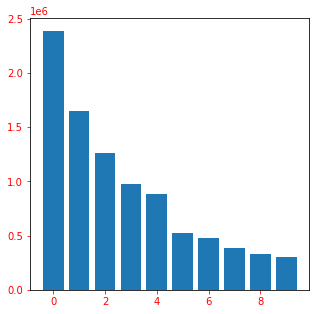

In [573]:
# plot by their indices
plt.rcParams['figure.figsize'] = 5,5
y = dframe['count'].head(10)
x = []
for i in range(10):
    x.append(i)
plt.bar(x, y)
plt.tick_params(colors='red')
plt.show()

## Interests - companies

In [364]:
dff = df.interests
dff.to_csv('interests.csv', index=False)

In [459]:
ds = pd.DataFrame(ff)

In [ ]:
dff = df.interests[0]['companies']

In [460]:
dff = df.interests[0]['companies']
dff2 = df.interests[1]['companies']

In [462]:
ff= pd.DataFrame(dff)
pp = pd.DataFrame(dff2)

alltogether = [ff, pp]
g = pd.concat(alltogether, axis=0)
g

,url,name,count
0,https://www.linkedin.com/company/13187/,Ville de Paris,95095
1,https://www.linkedin.com/company/15892/,Le Monde,928244
2,https://www.linkedin.com/company/503291/,Centre national de la fonction publique territ...,110789
3,https://www.linkedin.com/company/741350/,"Ministère de l’Économie, des Finances et de la...",126937
4,https://www.linkedin.com/company/796897/,Ecole des Ingénieurs de la Ville de Paris,6577
...,...,...,...
6,https://www.linkedin.com/company/36087960/,ANCTerritoires,35574
7,https://www.linkedin.com/company/36975740/,Le Campus du Val de Drôme,722
8,https://www.linkedin.com/company/70382437/,Petites villes de demain,16756
9,https://www.linkedin.com/company/70920149/,Direction générale des collectivités locales (...,12659
